<img src='mr.png' />

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

In [2]:
# Original Raw Data
df = pd.read_csv('Advertising.csv')
df.head()

,TV,radio,newspaper,sales
0,230100,37800,69200,22100
1,44500,39300,45100,10400
2,17200,45900,69300,9300
3,151500,41300,58500,18500
4,180800,10800,58400,12900


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   TV         200 non-null    int64
 1   radio      200 non-null    int64
 2   newspaper  200 non-null    int64
 3   sales      200 non-null    int64
dtypes: int64(4)
memory usage: 6.4 KB


In [4]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147042.500000,23264.000000,30554.000000,14022.500000
std,85854.236315,14846.809176,21778.620839,5217.456566
min,700.000000,0.000000,300.000000,1600.000000
25%,74375.000000,9975.000000,12750.000000,10375.000000
50%,149750.000000,22900.000000,25750.000000,12900.000000
75%,218825.000000,36525.000000,45100.000000,17400.000000
max,296400.000000,49600.000000,114000.000000,27000.000000


In [5]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


<Axes: >

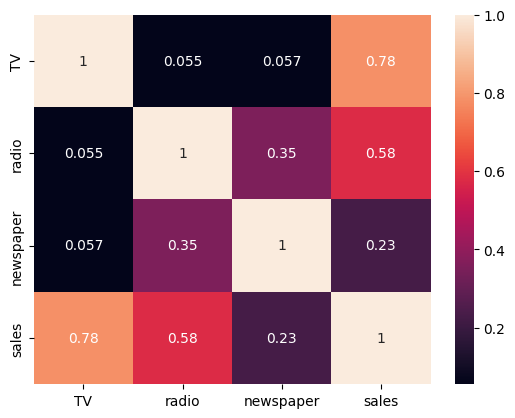

In [6]:
sns.heatmap(df.corr(),annot = True)

In [7]:
X = df[['TV','radio','newspaper']]
y = df['sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [9]:
print(model.intercept_)
print(model.coef_)

2979.0673381226334
[0.04472952 0.18919505 0.00276111]


In [10]:
sales_pred = model.predict([[230100,37800,69200]])
print(sales_pred)

[20613.97147016]


/Users/durgaprasad/Desktop/_WEEKEND/DAY1-Python-Flask/basicpythonenv/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [11]:
#Training data 

sales_pred_train = model.predict(X_train)
mse = mean_squared_error(sales_pred_train, y_train)
rmse = np.sqrt(mse)
r2 = r2_score(sales_pred_train,y_train)

print("Root Mean Squared Error:", rmse.round().astype(int))
print("R-squared:", r2)

Root Mean Squared Error: 1645
R-squared: 0.8835557925789809


In [12]:
#Testing Data
sales_pred_test = model.predict(X_test)
mse = mean_squared_error(sales_pred_test, y_test)
rmse = np.sqrt(mse)
r2 = r2_score(sales_pred_test,y_test)

print("Root Mean Squared Error:", rmse.round().astype(int))
print("R-squared:", r2)

Root Mean Squared Error: 1782
R-squared: 0.8791069137120031


In [13]:
#Calculating cross validation matrics

scores = cross_val_score(model,X,y,cv=5)
print(scores)
print('Cross Validation :', scores.mean())


[0.87865198 0.91763212 0.92933032 0.81443904 0.89547829]
Cross Validation : 0.8871063495438435


In [14]:
df.head()

,TV,radio,newspaper,sales
0,230100,37800,69200,22100
1,44500,39300,45100,10400
2,17200,45900,69300,9300
3,151500,41300,58500,18500
4,180800,10800,58400,12900


In [14]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Assuming you have defined your X_train and y_train
# Create a DataFrame from your training data
data = pd.concat([X_train, y_train], axis=1)

# Fit an OLS regression model
model = smf.ols(formula='y~X', data=df).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Wed, 22 May 2024   Prob (F-statistic):           1.58e-96
Time:                        16:22:46   Log-Likelihood:                -1767.7
No. Observations:                 200   AIC:                             3543.
Df Residuals:                     196   BIC:                             3557.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2938.8894    311.908      9.422      0.0

#Hence drop New Paper Column 

Here's what these coefficients mean:

TV Coefficient (0.04472952):
This indicates that, holding all other variables constant, an increase of 1 unit in TV advertising is associated with an increase of approximately 0.0447 units in sales.
Radio Coefficient (0.18919505):
This suggests that, holding all other variables constant, an increase of 1 unit in radio advertising is associated with an increase of approximately 0.1892 units in sales.
Newspaper Coefficient (0.00276111):
This implies that, holding all other variables constant, an increase of 1 unit in newspaper advertising is associated with an increase of approximately 0.0028 units in sales. This coefficient is very close to zero, suggesting that newspaper advertising has a minimal impact on sales in this model.

<h3> Based on the correlation matrix, TV and sales have a high correlation (0.782224). However, the linear regression model's coefficients are not solely determined by the correlation between individual features and the target variable. The coefficients are determined by how well the features together predict the target variable while accounting for multicollinearity among the features.

In this case, the high correlation between TV and sales suggests that TV advertising is an important predictor of sales, but when considering TV, radio, and newspaper advertising together in a multiple regression model, the influence of TV advertising might appear less dominant if radio advertising (which also has a significant positive correlation with sales) is accounting for some of the same variance in sales.</h3>